14-2-2021

# Cross-Validation

Cross-validation is a statistical method of evaluating generalization performance that
is more stable and thorough than using a split into a training and a test set

In [220]:
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

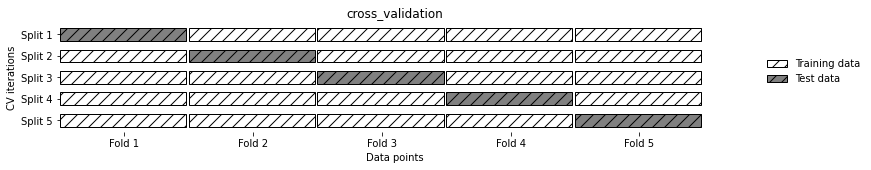

In [221]:
mglearn.plots.plot_cross_validation()

#### Evaluating *LogisticRegression* on the *iris dataset*

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(estimator=logreg, X=iris.data, y=iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [223]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


## Stratified k-Fold Cross-Validation and Other Strategies


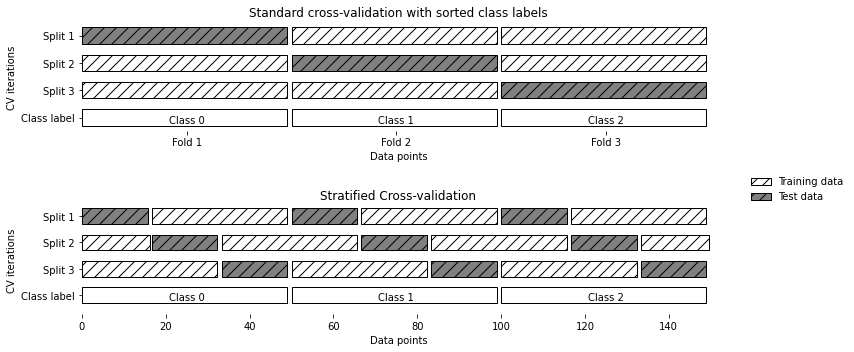

In [224]:
mglearn.plots.plot_stratified_cross_validation()

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [226]:
from sklearn.model_selection import KFold

In [227]:
iris = load_iris()
kfold = KFold(n_splits=3)
logreg = LogisticRegression()
# print(cross_val_score(estimator=logreg, X = iris.data, y=iris.target, cv = 3))
print(cross_val_score(estimator=logreg, X = iris.data, y=iris.target, cv = kfold))

[0. 0. 0.]


In [228]:
iris = load_iris()
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
logreg = LogisticRegression()
# print(cross_val_score(estimator=logreg, X = iris.data, y=iris.target, cv = 3))
print(cross_val_score(estimator=logreg, X = iris.data, y=iris.target, cv = kfold))

[0.98 0.94 0.96]


### Leave-one-out cross-validation

 You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample

In [229]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(estimator = logreg, X = iris.data, y = iris.target, cv = loo)

In [230]:
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

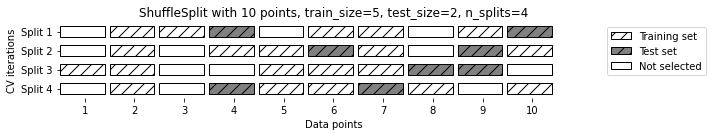

In [231]:
import mglearn
mglearn.plots.plot_shuffle_split()

In [232]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

In [233]:
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.97333333 0.96       0.97333333 0.96       0.94666667
 0.97333333 0.97333333 0.96       0.98666667]


### Cross-validation with groups

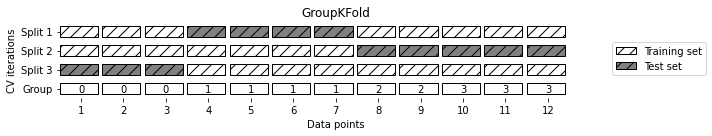

In [234]:
mglearn.plots.plot_group_kfold()

In [235]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


# **Grid Search**

## Simple Grid Search


In [236]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [237]:
# naive grid search implementation
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### Creating Validation set to validate the parameters

In [238]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            # rebuild a model on the combined training and validation set,
            # and evaluate it on the test set
            svm = SVC(**best_parameters)
            svm.fit(X_trainval, y_trainval)
            test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 84 size of validation set: 28 size of test set:38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation


In [239]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

iris = load_iris()
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(estimator=svm, X=X_trainval, y= y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            # rebuild a model on the combined training and validation set,
            # and evaluate it on the test set
            svm = SVC(**best_parameters)
            svm.fit(X_trainval, y_trainval)
            test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 84 size of validation set: 28 size of test set:38

Best score on validation set: 0.97
Best parameters:  {'C': 10, 'gamma': 0.1}
Test set score with best parameters: 0.97


### GridSearchCV class

In [240]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

when we call fit, it will
run cross-validation for each combination of parameters we specified in param_grid

In [243]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [244]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [245]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Analyzing the result of cross-validation

In [246]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002106,0.000313,0.000965,0.000106,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001165,0.000324,0.000523,0.000097,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000847,0.000232,0.000391,0.000084,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000704,0.000103,0.000319,0.000019,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000578,0.000023,0.000270,0.000008,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


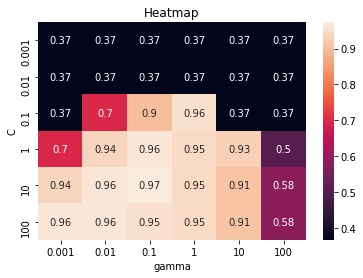

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = np.array(results['mean_test_score']).reshape(6,6)
ax = sns.heatmap(scores, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], annot=True)

ax.set(title="Heatmap",
      xlabel="gamma",
      ylabel="C")
plt.show()

### Search over spaces that are not grids

In [248]:
param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [249]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


### Using different cross-validation strategies with grid search

#### Nested cross-validation

#### Parallelizing cross-validation and grid search

# **Evaluation Metrics and Scoring**

## Metrics for Binary Classification

### Imbalanced datasets

In [250]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [251]:
pd.DataFrame(y)[0].value_counts()

False    1617
True      180
Name: 0, dtype: int64

In [252]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority = dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [253]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [254]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))


dummy score: 0.82
logreg score: 0.98


### Confusion matrices

In [255]:
from sklearn.metrics import confusion_matrix

# confusion = confusion_matrix(y_test, pred_logreg)
confusion = pd.crosstab(pred_logreg, y_test, rownames=['Prediction'], colnames=['Actual'], margins=True)

print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
Actual      False  True  All
Prediction                  
False         402     6  408
True            1    41   42
All           403    47  450


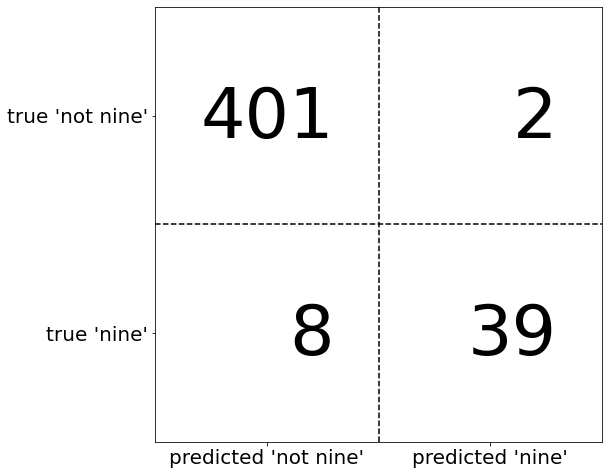

In [256]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

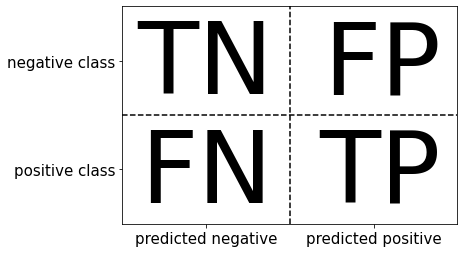

In [257]:
mglearn.plots.plot_binary_confusion_matrix()

In [258]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[361  42]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


In [259]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.09
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [260]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [261]:
print(classification_report(y_test, pred_dummy,target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.89      0.90      0.89       403
        nine       0.09      0.09      0.09        47

    accuracy                           0.81       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.81      0.81       450



In [262]:
print(classification_report(y_test, pred_logreg,target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Precision-recall curve

In [263]:
svc = SVC(gamma=.05).fit(X_train, y_train)

In [264]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

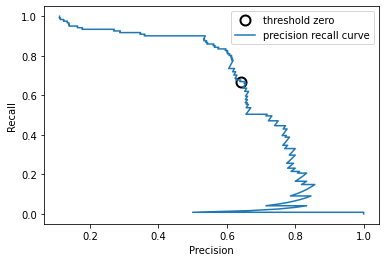

In [265]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.show()

Comparing **SVC** and **Random Forest** model performance using Precision-Recall curve

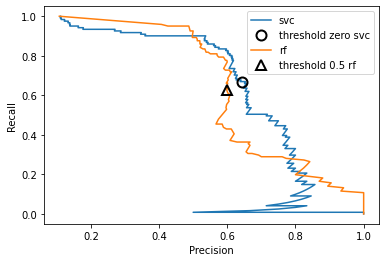

In [266]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [267]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


### ROC curve

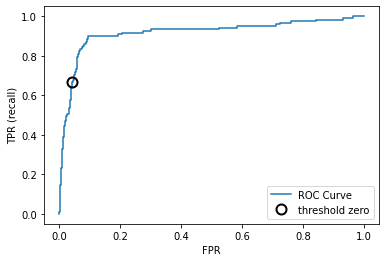

In [268]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Metrics for Multiclass Classification

In [271]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print()
confusion = pd.crosstab(pred, y_test, rownames=['Prediction'], colnames=['Actual'])
print("Confusion matrix:\n{}".format(confusion))

Accuracy: 0.951

Confusion matrix:
Actual       0   1   2   3   4   5   6   7   8   9
Prediction                                        
0           37   0   0   0   0   0   0   0   0   0
1            0  40   1   0   0   0   1   0   3   0
2            0   0  40   0   0   0   0   0   1   0
3            0   0   3  43   0   0   0   1   0   0
4            0   0   0   0  37   0   0   1   0   0
5            0   0   0   0   0  46   0   0   0   1
6            0   0   0   0   0   0  51   0   0   0
7            0   0   0   0   1   0   0  46   0   0
8            0   2   0   1   0   0   0   0  43   1
9            0   1   0   1   0   2   0   0   1  45


<AxesSubplot:xlabel='Actual', ylabel='Prediction'>

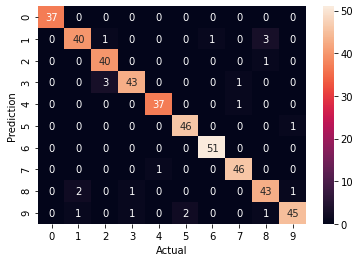

In [272]:
sns.heatmap(confusion, annot=True)

In [279]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The most commonly used metric for imbalanced datasets in the multiclass setting is
the multiclass version of the f-score

In [280]:
print("Micro average f1 score:{:.3f}".format(f1_score(y_test, pred,average="micro")))
print("Macro average f1 score:{:.3f}".format(f1_score(y_test, pred,average="macro")))

Micro average f1 score:0.951
Macro average f1 score:0.952


## Regression Metrics